In [5]:
import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [15]:
# Simulated data

N = 1000000

observation_day = np.random.choice(range(-10,10), N)
income = np.random.normal(20000, 1000, N)
age = np.random.uniform(60, 70, N)
children = np.random.choice([0,1,2,3,4,5], size=N, p=[0.1, 0.2, 0.3, 0.2, 0.1, 0.1])
district = np.random.choice(["Central", "S", "SW", "W", "NW", "N", "NE", "E", "SE"], size=N)

T = (age > 65) * (observation_day >= 0)

a = 10
b = 40
c = 10
d = 300
g = 2
h = 30
i = 4
e = 0.01

Y0 = income - age * a * children + children * b - c * (children ** 2) + (district == 'Central') * d - 20000 + np.random.normal(0, 50, N)
Y1 = Y0 + (- age * g + np.isin(district, ['S', 'SE']) * h + i * children + e * income)*3 - 500 + np.random.normal(0, 0, N)

Y0 = np.random.binomial(1, expit(Y0/1000))
Y1 = np.random.binomial(1, expit(Y1/1000))

Y = Y0 * (1 - T) + Y1 * T

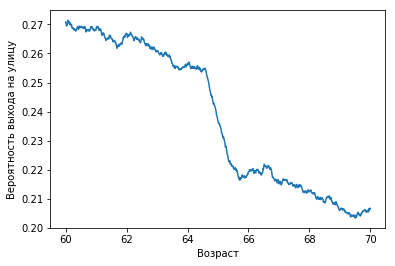

In [16]:
# После введения политики

from sklearn.neighbors import RadiusNeighborsRegressor

model = RadiusNeighborsRegressor(radius=0.4)
model.fit(age[observation_day >= 0, np.newaxis], Y[observation_day >= 0])

plt.plot(np.arange(60, 70, 0.01), model.predict(np.arange(60, 70, 0.01)[:, np.newaxis]))
plt.xlabel(u"Возраст")
plt.ylabel(u"Вероятность выхода на улицу")
plt.show()

In [4]:
# Средний эффект

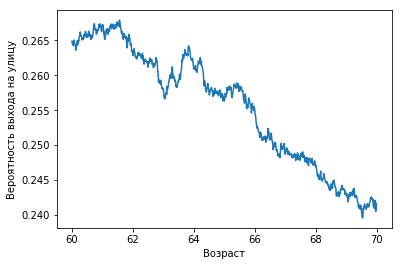

In [25]:
# До введения политики

from sklearn.neighbors import RadiusNeighborsRegressor

model = RadiusNeighborsRegressor(radius=0.4)
model.fit(age[observation_day < 0, np.newaxis], Y[observation_day < 0])

plt.plot(np.arange(60, 70, 0.01), model.predict(np.arange(60, 70, 0.01)[:, np.newaxis]))
plt.xlabel(u"Возраст")
plt.ylabel(u"Вероятность выхода на улицу")
plt.show()

In [21]:
# Средний эффект

In [22]:
# Гетерогенный эффект + похвастаться делением

In [23]:
from catboost import CatBoostRegressor, CatBoostClassifier

X = np.column_stack([income, district, children])[(observation_day > 0) & (age > 62) & (age < 67), :]
Y_tilde = Y[(observation_day > 0) & (age > 62) & (age < 67)]

T_pr = T[(observation_day > 0) & (age > 62) & (age < 67)]

X_train, X_test, Y_train, Y_test, T_train, T_test = train_test_split(X, Y_tilde, T_pr, test_size=0.2)

Y_train = Y_train * T_train - Y_train * (1 - T_train)
dense_model = CatBoostRegressor(iterations=300, l2_leaf_reg=0.5).fit(X_train, Y_train, cat_features=[1])
dense_model2 = CatBoostClassifier(iterations=300, l2_leaf_reg=0.5).fit(X_train[T_train == 1, :], Y_train[T_train == 1], cat_features=[1])



0:	learn: 0.4883653	total: 24.1ms	remaining: 7.2s
1:	learn: 0.4882476	total: 46.4ms	remaining: 6.92s
2:	learn: 0.4881500	total: 68ms	remaining: 6.74s
3:	learn: 0.4880459	total: 89.3ms	remaining: 6.6s
4:	learn: 0.4879504	total: 111ms	remaining: 6.52s
5:	learn: 0.4878694	total: 126ms	remaining: 6.19s
6:	learn: 0.4877862	total: 147ms	remaining: 6.15s
7:	learn: 0.4877030	total: 168ms	remaining: 6.11s
8:	learn: 0.4876287	total: 186ms	remaining: 6.01s
9:	learn: 0.4875694	total: 200ms	remaining: 5.8s
10:	learn: 0.4875005	total: 224ms	remaining: 5.87s
11:	learn: 0.4874378	total: 243ms	remaining: 5.83s
12:	learn: 0.4873724	total: 264ms	remaining: 5.82s
13:	learn: 0.4873146	total: 282ms	remaining: 5.75s
14:	learn: 0.4872577	total: 300ms	remaining: 5.7s
15:	learn: 0.4872138	total: 316ms	remaining: 5.61s
16:	learn: 0.4871645	total: 337ms	remaining: 5.61s
17:	learn: 0.4871175	total: 355ms	remaining: 5.57s
18:	learn: 0.4870702	total: 375ms	remaining: 5.55s
19:	learn: 0.4870241	total: 398ms	remaining

161:	learn: 0.4861219	total: 2.69s	remaining: 2.29s
162:	learn: 0.4861208	total: 2.71s	remaining: 2.28s
163:	learn: 0.4861196	total: 2.72s	remaining: 2.26s
164:	learn: 0.4861186	total: 2.74s	remaining: 2.24s
165:	learn: 0.4861184	total: 2.75s	remaining: 2.22s
166:	learn: 0.4861182	total: 2.77s	remaining: 2.2s
167:	learn: 0.4861182	total: 2.77s	remaining: 2.18s
168:	learn: 0.4861179	total: 2.78s	remaining: 2.16s
169:	learn: 0.4861177	total: 2.79s	remaining: 2.13s
170:	learn: 0.4861167	total: 2.81s	remaining: 2.12s
171:	learn: 0.4861167	total: 2.81s	remaining: 2.09s
172:	learn: 0.4861147	total: 2.83s	remaining: 2.08s
173:	learn: 0.4861112	total: 2.85s	remaining: 2.06s
174:	learn: 0.4861112	total: 2.86s	remaining: 2.04s
175:	learn: 0.4861099	total: 2.88s	remaining: 2.03s
176:	learn: 0.4861097	total: 2.89s	remaining: 2.01s
177:	learn: 0.4861089	total: 2.9s	remaining: 1.99s
178:	learn: 0.4861086	total: 2.92s	remaining: 1.97s
179:	learn: 0.4861062	total: 2.94s	remaining: 1.96s
180:	learn: 0.

23:	learn: 0.4709462	total: 443ms	remaining: 5.09s
24:	learn: 0.4676327	total: 461ms	remaining: 5.07s
25:	learn: 0.4646935	total: 481ms	remaining: 5.07s
26:	learn: 0.4619323	total: 500ms	remaining: 5.06s
27:	learn: 0.4593300	total: 519ms	remaining: 5.04s
28:	learn: 0.4568702	total: 537ms	remaining: 5.01s
29:	learn: 0.4545018	total: 554ms	remaining: 4.99s
30:	learn: 0.4524687	total: 575ms	remaining: 4.99s
31:	learn: 0.4504275	total: 594ms	remaining: 4.97s
32:	learn: 0.4486579	total: 610ms	remaining: 4.94s
33:	learn: 0.4469332	total: 627ms	remaining: 4.9s
34:	learn: 0.4453438	total: 648ms	remaining: 4.91s
35:	learn: 0.4439277	total: 665ms	remaining: 4.88s
36:	learn: 0.4425400	total: 682ms	remaining: 4.84s
37:	learn: 0.4412739	total: 698ms	remaining: 4.82s
38:	learn: 0.4401367	total: 713ms	remaining: 4.77s
39:	learn: 0.4394031	total: 725ms	remaining: 4.71s
40:	learn: 0.4383220	total: 739ms	remaining: 4.67s
41:	learn: 0.4372540	total: 757ms	remaining: 4.65s
42:	learn: 0.4363420	total: 774m

186:	learn: 0.4181281	total: 3.15s	remaining: 1.9s
187:	learn: 0.4181138	total: 3.17s	remaining: 1.89s
188:	learn: 0.4181049	total: 3.18s	remaining: 1.87s
189:	learn: 0.4181006	total: 3.2s	remaining: 1.85s
190:	learn: 0.4180882	total: 3.21s	remaining: 1.83s
191:	learn: 0.4180754	total: 3.23s	remaining: 1.81s
192:	learn: 0.4180570	total: 3.24s	remaining: 1.8s
193:	learn: 0.4180503	total: 3.26s	remaining: 1.78s
194:	learn: 0.4180434	total: 3.28s	remaining: 1.76s
195:	learn: 0.4180374	total: 3.29s	remaining: 1.75s
196:	learn: 0.4180254	total: 3.31s	remaining: 1.73s
197:	learn: 0.4180200	total: 3.34s	remaining: 1.72s
198:	learn: 0.4180148	total: 3.35s	remaining: 1.7s
199:	learn: 0.4180097	total: 3.37s	remaining: 1.68s
200:	learn: 0.4180005	total: 3.38s	remaining: 1.67s
201:	learn: 0.4180005	total: 3.39s	remaining: 1.64s
202:	learn: 0.4179985	total: 3.4s	remaining: 1.63s
203:	learn: 0.4179968	total: 3.42s	remaining: 1.61s
204:	learn: 0.4179860	total: 3.43s	remaining: 1.59s
205:	learn: 0.417

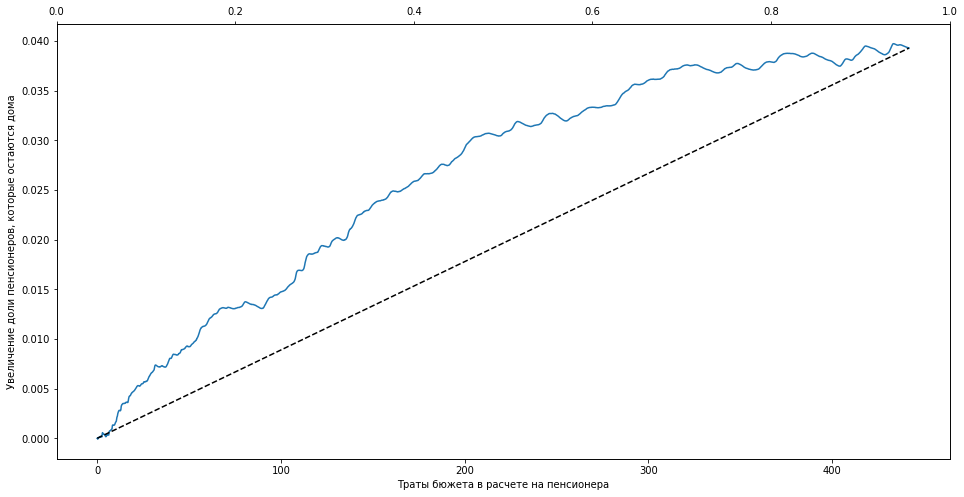

In [18]:
from zoo.utils.uplift.evaluation import bootstraped_efficiency_curve

score = dense_model.predict(X_test)/dense_model2.predict_proba(X_test)[:, 1]
Y_true = np.column_stack([Y_test * 2000 * T_test, -Y_test])

# ЕДИНИЦА МИНУС!

cum, th = bootstraped_efficiency_curve(Y_true, score, T_test)


fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(cum[:, 0], cum[:, 1])
ax1.plot([cum[0, 0], cum[-1, 0]], [cum[0, 1], cum[-1, 1]], linestyle='--', color='k')
ax1.set_xlabel(u'Траты бюжета в расчете на пенсионера')
ax1.set_ylabel(u'Увеличение доли пенсионеров, которые остаются дома')


plt.show()